In [1]:
# 인간관계 네트워크를 가시화해보자!
import pandas as pd
df_links = pd.read_csv('links.csv')
df_links.head()

# 고객이 SNS에 연결이 되어있는지 안되어있는지 확인을 해준다. 0이면 연결 X, 1이면 연결 O

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


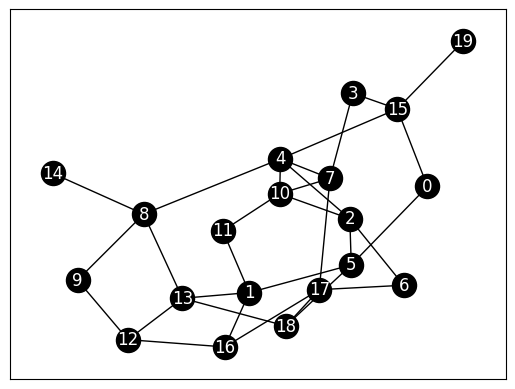

In [2]:
# 노드와의 관계를 가시화 해보자.
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
NUM = len(df_links.index)
for i in range(1, NUM + 1):
  node_no = df_links.columns[i].strip('Node')
  G.add_node(str(node_no))

# 엣지 설정
for i in range(NUM):
  for j in range(NUM):
    node_name = "Node" + str(j)

    if df_links[node_name].iloc[i] == 1:
      G.add_edge(str(i), str(j))

# 그리기
nx.draw_networkx(G, node_color = "k", edge_color = 'k', font_color = 'w')  # draw_networkx 다른 것과 연결이 많은 노드를 중심에 오게 자동으로 위치를 결정해서 가시화해준다.
plt.show()

In [3]:
# 10개의 연결 중 하나의 확률(10%의 확률)로 소문이 전파된다.를 가정하고 시뮬레이션을 돌려보자!

In [4]:
import numpy as np

In [5]:
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

# determine_link 함수는 입소문의 전파 여부를 확률적으로 결정한다. 인수로 입소문을 낼 확률을 전달한다.

In [6]:
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active


# simulate_percolation 함수는 입소문을 시뮬레이션을 한다. 첫 번째 인수 num은 사람 수,
# 두 번째 인수 list_active는 가각의 노드에 입속문이 전달됐는지를 1또는 0으로 표현한 배열이다.
# 세 번째 인수 percent_percolation는 입소문을 일으킬 확률이다.

In [7]:
percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

# 한 달에 입소문을 일으킬 확률 10%로, 36스텝을 반복한다.

In [8]:
# 입소문의 모습을 네트워크로 가시화

def active_node_coloring(list_active):
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    #print(len(list_color))
    return list_color

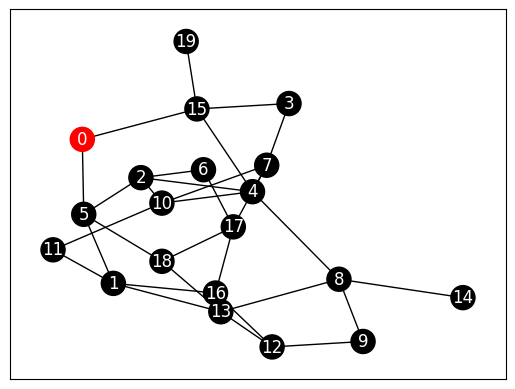

In [9]:
# 0개월 차는 노드는 1개

t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

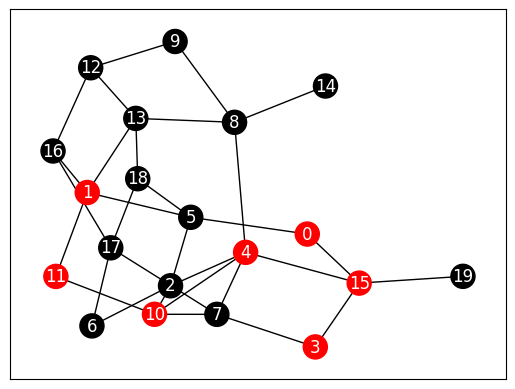

In [10]:
# 11개월차에는 완만하게 전파됬음을 확인할 수 있다.

t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

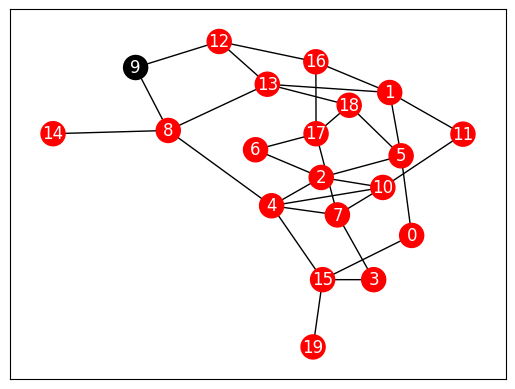

In [11]:
# 오랜 시간이 경과하면 거의 전원에게 전파가 된 시뮬레이션을 확인할 수 있었다.

t = 35
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

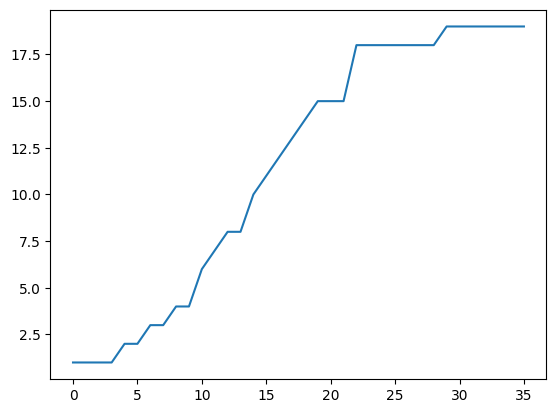

In [12]:
# 입소문 수의 시계열 변화를 그래프화해보자.
list_timeSeries_num =[]
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

# 시간에 따라 단계적으로 입소문이 나는 모습을 확인할 수 있었다.

In [13]:
# 회원 수의 시계열 변화를 시뮬레이션 해보자.

def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
  #확산#
  for i in range(num):
    if list_active[i] == 1:
      for j in range(num):
        if df_links.iloc[i][j] == 1:
          if determine_link(percent_percolation) == 1:
            list_active[j] = 1
  #소멸#
  for i in range(num):
    if determine_link(percent_disapparence) == 1:
      list_active[i] = 0
  return list_active

In [15]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,
                                    df_links)
  list_timeSeries.append(list_active.copy())

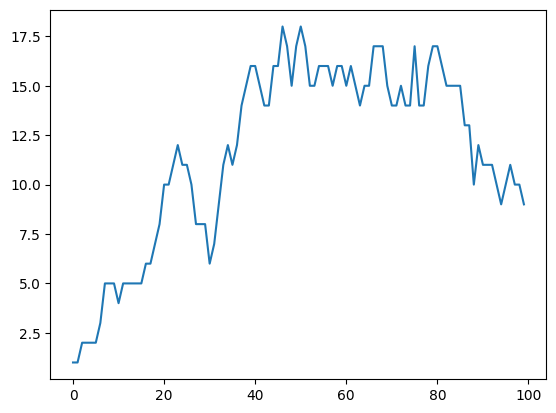

In [17]:
# 시계열 그래프 그리기
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

# simulate_population 함수는 입소문 전파(확산)뿐만 아니라 새롭게 '소멸'이라는 조작도 추가한다.
# 어느 날 갑자기 이용하지 않는 회원이 있을 수 도 있다.
# 그 확률을 5%로 가정하고 입소문에 의한 회원 증가와 감소의 모습을 시뮬레이션했다.
# 그래프와 같이 증감을 반복하며 서서히 100%의 이용률을 향해 가는 모습을 확인 할 수 있었다.
# SNS 입소문의 힘으로 조금씩 센터를 이용해서 이용하는 힘이 강해지는 것으로 보아 현실에 맞는 시뮬레이션 결과라는 것을 알 수 있었다.

In [18]:
# 소멸의 확률을 조금 늘려보자.
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

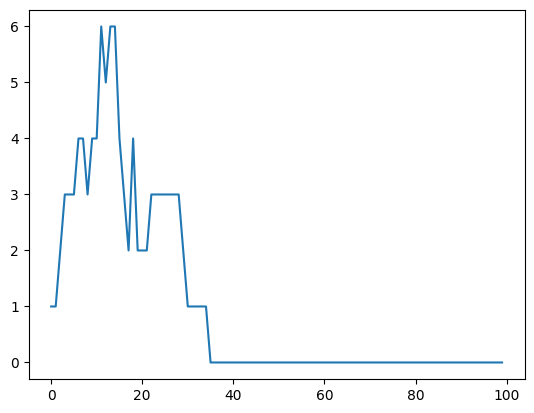

In [19]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

# 소멸 확률을 늘리니 이용자가 줄어드는 것을 확인할 수 있었으며, 40개월 후에는 이용자가 없어지는 모습을 확인할 수 있었다.


In [ ]:
# 입소문 전파와 이용 중단이 어떤 확률로 일어나는지는 상품이나 서비스의 성질에 따라 달라지고,
# 캠페인 유무에 따라 영향을 크게 받는다. 그리고 이 확률이 상품의 보급에 어떻게 영향을 주는지가 중요하다.
# 이런 보급의 모습을 파악하기 위해서는 상관관계를 그리면 알기 쉽다.

In [20]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)
print(phaseDiagram)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 14. 13. 14. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 17.  8. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 14. 14. 15.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 18. 12. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 12. 18. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 16.  0. 14.  6. 11.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 15. 13. 14. 15.  9. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 16. 15. 17. 15. 16. 11. 10.  0.  0.  0.  0.  0.  0.  0.

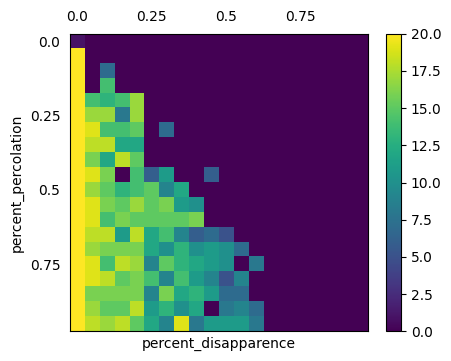

In [21]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

# 결과는 입소문이 일어날 확률과 소멸이 일어날 확률을 조금씩 변화시키면서 100개월 후에 몇 명이 계속 이용하는지를 색으로 표시한 것이다.
# 소멸의 확률이 낮으면 입소문의 확률이 어느 정도 낮아도 탈퇴 없이 20명 전원이 이용하고 있는 것을 볼 수 있으며
# 반대로 소멸의 확률이 20~30%를 넘으면 아무리 입소문의 확률이 높더라도 이용자는 증가하지 않는 모습을 볼 수 있다.

In [22]:
df_mem_links = pd.read_csv("links_members.csv")
df_mem_info = pd.read_csv("info_members.csv")
df_mem_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Node535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
536,Node536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
537,Node537,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
538,Node538,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
# 링크 수의 분포를 가시화 해보자.

NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])

# 네트워크를 가시화하는 것이 좋지만, 540명이라는 규모는 네트워크를 가시화해도 노드가 밀집해서 네트워크의 상황을 보기가 어렵다.
# 네트워크의 구조에는 몇 안되는 스텝으로 전원이 연결되는 '스몰 월드형'과 소수의 연결을 많이 가지는 사람이 허브가 되는 '스케일 프리형' 등 여러 가지가 있다.
# 어떤 구조를 가지고 있는지 링크 수의 분포를 가시화해보자.

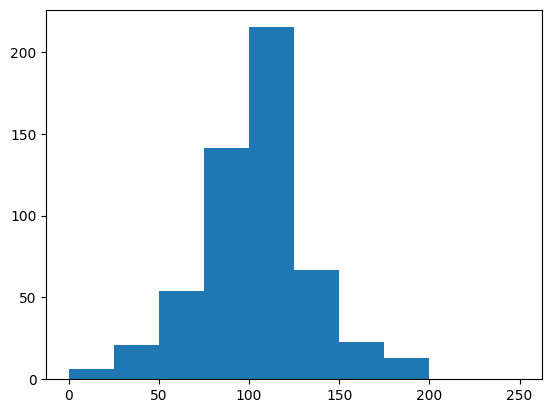

In [24]:
plt.hist(array_linkNum, bins=10,range=(0,250))
plt.show()

# 그래프를 보면 링크 개수가 대략 100정도에 집중된 정규분포에 가까운 모습인 것을 알 수 있다.
# 스케일 프리형이라면 이 분포가 '멱 법칙(Power-law Distribution)'에 가까워지며,
# 링크를 많이 가진 허브가 작동하지 앟으면 입속문이 중간에 퍼지지 않는 특징을 가지고 있다.
# 이 분포는 거의 모든 노드가 어느 정도의 링크 수를 가지고 있는 분포이기 때문에 '급격히 입소문이 퍼지지 않는' 대신에 '허브에 의존하지 않고 입소문이 퍼지기 쉽다'라고 볼 수 있다.

In [ ]:
# 시뮬레이션을 위해 실제 데이터로부터 파라미터를 추정해보자.

In [25]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1
# 소멸 확률 추정 #
count_active = 0
count_active_to_inactive = 0
for t in range(1,T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i][t+1]==0):
                count_active += 1
estimated_percent_disapparence = count_active/count_active_to_inactive

In [26]:
# 확산 확률 추정 #
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1]
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link += 1
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    if (temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

In [27]:
estimated_percent_disapparence

0.10147163541419416

In [28]:
estimated_percent_percolation

0.025184661323275185

In [30]:
# 실제 데이터와 시뮬레이션을 비교해보자.

In [32]:
from tqdm import tqdm

percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in tqdm(range(T_NUM)):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

100%|██████████| 24/24 [36:04<00:00, 90.18s/it] 


In [33]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [34]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

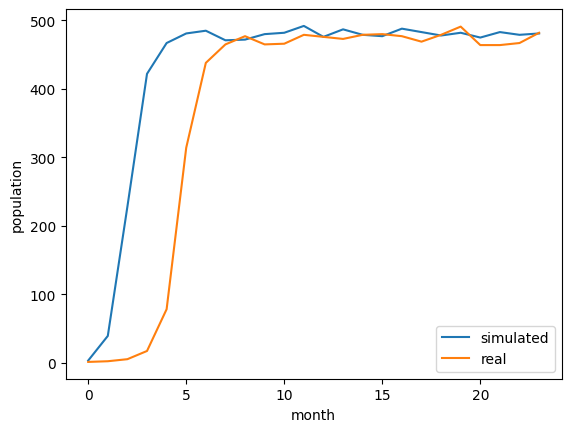

In [35]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

# 코드 실행 결과 시뮬레이션에 의한 이용자 수와 실제 데이터가 비슷하게 움직이는 것을 확인할 수 있었다.
# 시뮬레이션으로 어느 지점에서 어느 지점에서 이용자가 급격히 증가하는지의 경향은 확인되지만, 프로그램 난수의 영향으로 3~5개월 이르게 증가하거나 늦게 증가하는 경우가 있어 증가하는 시간대나 시기에 오차가 생긴다는 점이다.

In [36]:
# 시뮬레이션으로 미래를 예측해보자.
# 시뮬레이터으 지속시간을 36개월로 설정하고 시뮬레이션을 실행해보자.

T_NUM = 36

In [37]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [38]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

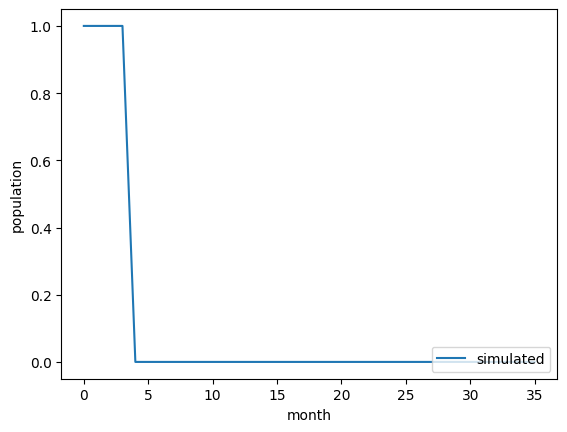

In [39]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

# 결과를 보면 24개월 이후는 population에 큰 변화가 없는 '평범한 결과'처럼 보이지만, 중요한 것은 population이 '급격히 감소하지 않고 지속된다는 것을 확인할 수 있다.'라는 것이다.
# population이 변화 없이 지속될 것이라는 결론이 '당연'하다고 생각할 수도 있지만, 그것이 '현실로 나타날 때까지' 알 수 가 없다.